In [1]:
#Load the dataset
import pandas as pd 
dataset = pd.read_csv('tweets.csv', encoding = 'ISO-8859-1')

dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [2]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.text.str)


RT              11053
to               7650
is               5152
in               4491
the              4331
                ...  
poor..!             1
@aapkarajiv:        1
Arvind,             1
@NeetuGarg6         1
#WalnutApp          1
Length: 19601, dtype: int64

In [3]:
# Text clkeaning
import re

def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

In [4]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'are', 'other', 'since', 'their', 'above', 'like', 'our', 'should', 'who', 'up', "hadn't", 'do', "isn't", 'about', "we're", 'just', "mustn't", 'so', 'if', 'she', "there's", 'when', 'or', 'these', 'however', "where's", "weren't", 'at', "he's", 'through', 'which', "wouldn't", "when's", "can't", "aren't", "i'd", 'had', 'i', 'to', 'of', "what's", 'been', 'else', 'whom', 'could', "you're", 'before', 'why', 'there', 'both', 'here', 'has', 'ever', 'on', "we've", 'him', 'those', "she'll", 'what', "didn't", 'himself', 'did', "don't", 'only', 'herself', 'few', 'shall', "you've", 'themselves', 'under', "how's", 'while', 'again', "wasn't", 'we', 'http', 'is', 'with', 'where', 'further', "i've", 'an', 'from', 'as', "it's", 'be', "you'll", 'then', 'below', 'com', 'a', 'own', 'into', 'yourself', 'his', 'its', 'cannot', 'therefore', 'between', 'because', 'hence', 'not', 'were', 'hers', 'he', 'nor', 'some', 'have', 'down', "we'll", "we'd", 'does', 'r', "haven't", 'am', 'theirs', 'after', "won't", 'k',

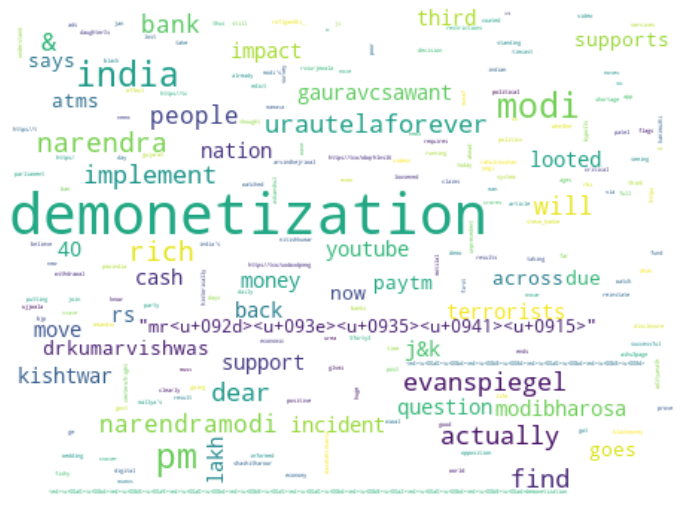

In [5]:

text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()